Main topic: Is Graduate School worth it? <br>
To do this we wanted to compare the salaries of people (both men and women) that have obtained a bachelors degree v. a masters degree over time. 
The data that we are using for this project comes from a 2021 National Survey of College Graduates conducted by the National Science Foundation. 
Link to data source: https://ncses.nsf.gov/pubs/nsf23306 <br>
We specifically looked at the data table labeled "Median annual salaries of full-time employed college graduates, by major occupation, age, level of highest degree, and sex: 2021". <br>
From there we put the data into an excel sheet in a readable format. 

In [3]:
# import the packages
import pandas as pd
import matplotlib.pyplot as plt
import math

# reading in the excel sheet to a data frame
data = pd.read_excel("./mad-annual-sallaries-updated.xlsx")
# dropping the rows that have null values in the Total column 
data = data.drop(data[data["Total"] == 'S'].index)
data = data.drop(data[data["Total"] == 'D'].index)
# looking at the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 0 to 127
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Ages          110 non-null    object
 1   Field         110 non-null    object
 2   Degree-Level  110 non-null    object
 3   Total         110 non-null    object
 4   Female        110 non-null    object
 5   Male          110 non-null    object
dtypes: object(6)
memory usage: 6.0+ KB


After looking at this info we can see that we are working with 110 lines of data in 6 different fields: Ages, Field, Degree-Level, Total, Female, Male. The total column represents the median annual salaries for both male and female. When it comes to the the degree levels there are 4: bachelors, masters, professional, and doctorate. Fields represents the majors/career paths of the groups. Lastly, Ages is broken into 4 categories: 29 and youger, 30-39, 40-49, and 50-75. With all of theese field we will try to see if, overtime, there is a significant salary difference to make a postbaccalaureate eduacation worth it. 

In [4]:
# Now that the reading and cleaning is complete, we will group by different levels of education to make graphs with

# rename the column "Female " to "Female" (removing the space after)
data = data.rename(columns={'Female ': 'Female'})
data['Field'].replace(['Biological, agricultural, and other life scientists', 'Computer and mathematical scientists', 'Physical and related scientists', 'Social and related scientists'], ['Life Scientists', 'Comp and Math Scientists', 'Physical Scientists', 'Social Scientists'], inplace=True)

# Filtering the data to subset bachelor's and master's degrees
bachelors = data[data['Degree-Level'] == "Bachelor's"]
masters = data[data['Degree-Level'] == "Master's"]

# Group the data by age group and get the mean of the salaries for each group
bachelors_totals = bachelors.groupby("Ages")["Total"].mean()
masters_totals = masters.groupby("Ages")["Total"].mean()

# Group the data by age group and get the mean of the salaries for each group
bachelors_totals_field = bachelors.groupby("Field")["Total"].mean()
masters_totals_field = masters.groupby("Field")["Total"].mean()

bachel = data.iloc[0,2]

# making a df that gets the mean of all Postbaccalaureate programs by ages
grad = data[data['Degree-Level'] != bachel]
grad_totals = grad.groupby("Ages")["Total"].mean()

# looking at the mean salary for bachelors and masters 
print(bachelors_totals)
print(masters_totals)
print(grad_totals)

Ages
29 and younger    57125.000000
30–39             76875.000000
40–49             89250.000000
50–75             95857.142857
Name: Total, dtype: float64
Ages
29 and younger     62250.0
30–39              85000.0
40–49              98000.0
50–75             105250.0
Name: Total, dtype: float64
Ages
29 and younger     65875.000000
30–39              92450.000000
40–49             117000.000000
50–75             118863.636364
Name: Total, dtype: float64


In [5]:
# looking at the potential of teirs, display a low paying field, middle and high to see if grad school would be worth it based on different salaries
# printing the mean of all non-science & engineering related fields
non_s_e = data.iloc[50,1]
non_s_e_df = data[data['Field'] == non_s_e]
print("Non Science and Engineering Field")
print(non_s_e_df['Total'].mean())

# printing the mean of all science and engineering related fields
s_e = data.iloc[40,1]
s_e_df = data[data['Field'] == s_e]
print("Science and Engineering Field")
print(s_e_df['Total'].mean())

# printing the mean salary of computer and mathmatical related sciences fields
comp_math = data.iloc[10,1]
df_comp_math = data[data['Field'] == comp_math]
print("Computer and Mathmatical Sciences")
print(df_comp_math['Total'].mean())

Non Science and Engineering Field
84333.33333333333
Science and Engineering Field
103250.0
Computer and Mathmatical Sciences
112500.0


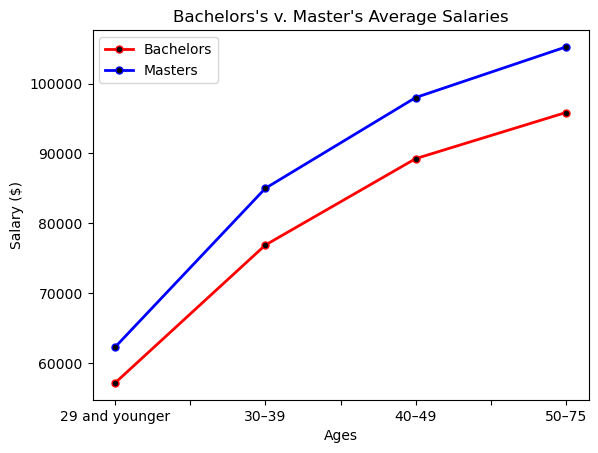

In [6]:
# graph 1 - looking at the difference in means of bachelors v. masters over the ages
bachelors_totals.plot(label = "Bachelors", color='red', linewidth = 2, marker='o', markerfacecolor='black', markersize=5)
masters_totals.plot(label = "Masters", color='blue', linewidth = 2, marker='o', markerfacecolor='black', markersize=5)
plt.title("Bachelors's v. Master's Average Salaries")
plt.ylabel('Salary ($)')
plt.legend()


Ages
29 and younger    5125.000000
30–39             8125.000000
40–49             8750.000000
50–75             9392.857143
Name: Total, dtype: float64


Text(0, 0.5, 'Salary ($)')

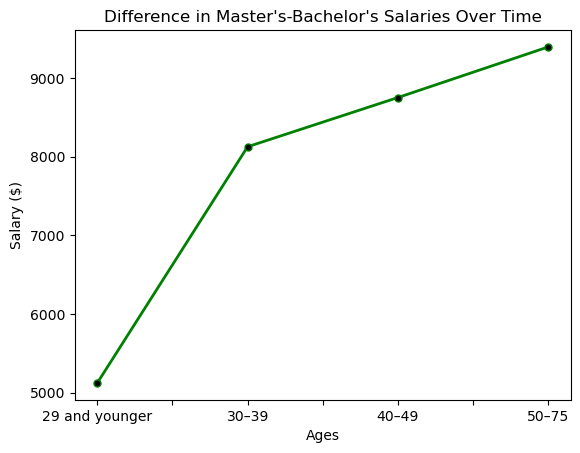

In [7]:
# graph 2 - difference in salary over the ages for masters v bachelors
difference_totals = masters_totals - bachelors_totals
print(difference_totals)
difference_totals.plot(color='green', linewidth = 2, marker='o', markerfacecolor='black', markersize=5)
plt.title("Difference in Master's-Bachelor's Salaries Over Time")
plt.ylabel('Salary ($)')
# This graph is particulary intresting as it shows that overtime, the gap between the people that have obtained a master degree vs those
# that only obtained a bachelors degree grows significantly overtime 
# It starts off with only a 5k difference but drasticaly jumps to 8k in only a matter of 1-10 years


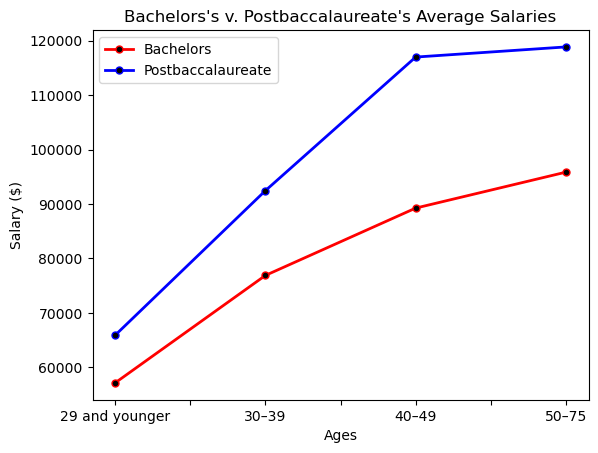

In [8]:
# graph 3 - bachelors salaries v. all Postbaccalaureate programs line graph
bachelors_totals.plot(label = "Bachelors", color='red', linewidth = 2, marker='o', markerfacecolor='black', markersize=5)
grad_totals.plot(label = "Postbaccalaureate", color='blue', linewidth = 2, marker='o', markerfacecolor='black', markersize=5)
plt.title("Bachelors's v. Postbaccalaureate's Average Salaries")
plt.ylabel('Salary ($)')
plt.legend()


C:\Users\carol\AppData\Local\Temp\ipykernel_32944\45868015.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels = ages, rotation=90)
C:\Users\carol\AppData\Local\Temp\ipykernel_32944\45868015.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels = ages, rotation=90)


Text(0, 0.5, 'Salary ($)')

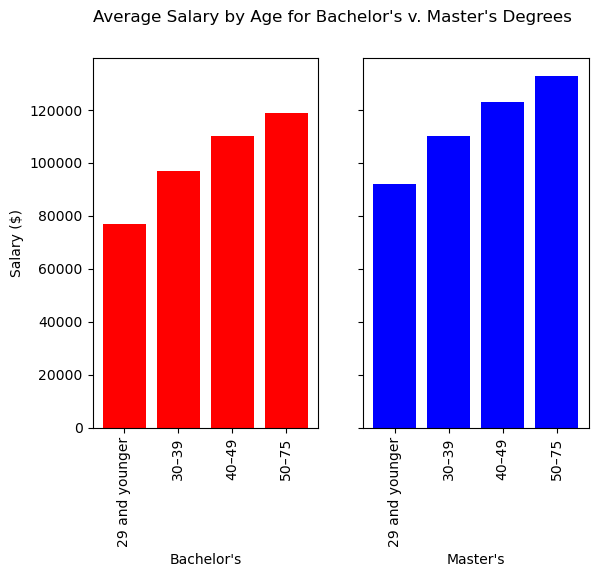

In [9]:
# graph 4 - average salary by age for bachelors v. master in bar chart format 
ages = data['Ages']
# bar graph of median salary by age for bachelor's vs master's degrees
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.suptitle("Average Salary by Age for Bachelor's v. Master's Degrees")

ax1.bar(bachelors.Ages, bachelors.Total, color = "red")
ax2.bar(masters.Ages, masters.Total, color = "blue")
#fig.set_figwidth(25) #if we didnt want to rotate the axis labels
ax1.set_xticklabels(labels = ages, rotation=90)
ax2.set_xticklabels(labels = ages, rotation=90)
ax1.set_xlabel("Bachelor's")
ax2.set_xlabel("Master's")
ax1.set_ylabel("Salary ($)")

C:\Users\carol\AppData\Local\Temp\ipykernel_32944\1027456360.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels = Fields, rotation=90) # without this and use commented fig size to get horizontal labels


Text(0.5, 0, 'Field')

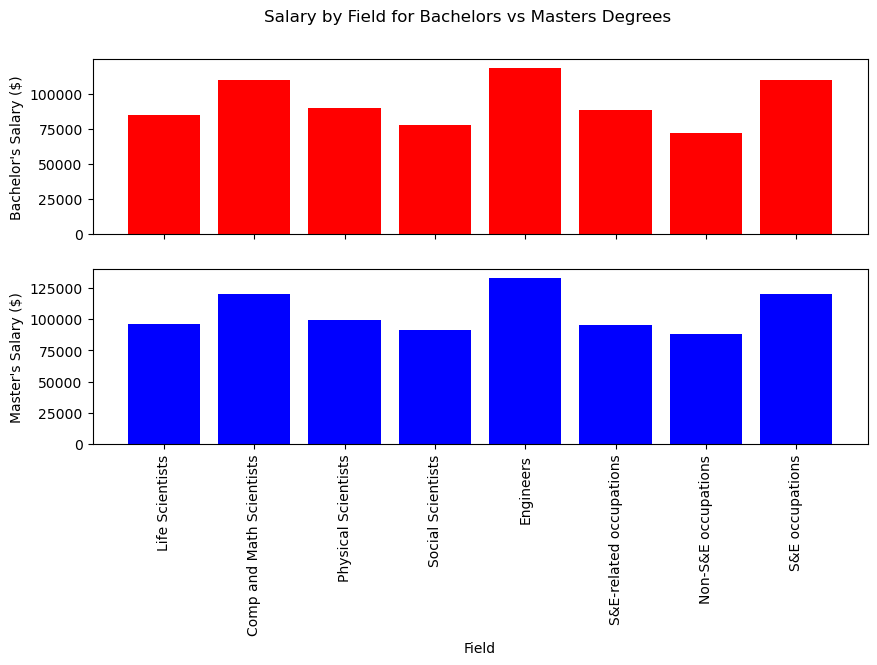

In [10]:
# graph 5 - salary by fields for masters v. bachelors bar graph
# creating a list Fields that has all the unique types of fields
data['Field'].replace(['Biological, agricultural, and other life scientists', 'Computer and mathematical scientists', 'Physical and related scientists', 'Social and related scientists'], ['Life Scientists', 'Comp and Math Scientists', 'Physical Scientists', 'Social Scientists'], inplace=True)
Fields = data['Field'].unique()
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.set_figheight(5)
fig.set_figwidth(10)
#fig.set_figheight(12)
#fig.set_figwidth(35)
fig.suptitle("Salary by Field for Bachelors vs Masters Degrees")
ax1.bar(bachelors.Field, bachelors.Total, color = "red")
ax2.bar(masters.Field, masters.Total, color = "blue")
ax1.set_ylabel("Bachelor's Salary ($)")
ax2.set_ylabel("Master's Salary ($)")
ax2.set_xticklabels(labels = Fields, rotation=90) # without this and use commented fig size to get horizontal labels
plt.xlabel("Field")

In [11]:
difference_totals_field = pd.DataFrame(masters_totals_field - bachelors_totals_field)
print(difference_totals_field)

                                 Total
Field                                 
Comp and Math Scientists  13000.000000
Engineers                 11750.000000
Life Scientists            3000.000000
Non-S&E occupations        9750.000000
Physical Scientists        8000.000000
S&E occupations            8750.000000
S&E-related occupations    9750.000000
Social Scientists          5916.666667


(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.]),
 [Text(-1.0, 0, 'Social Scientists'),
  Text(0.0, 0, 'Comp and Math Scientists'),
  Text(1.0, 0, 'Engineers'),
  Text(2.0, 0, 'Life Scientists'),
  Text(3.0, 0, 'Non-S&E occupations'),
  Text(4.0, 0, 'Physical Scientists'),
  Text(5.0, 0, 'S&E occupations'),
  Text(6.0, 0, 'S&E-related occupations'),
  Text(7.0, 0, 'Social Scientists'),
  Text(8.0, 0, '')])

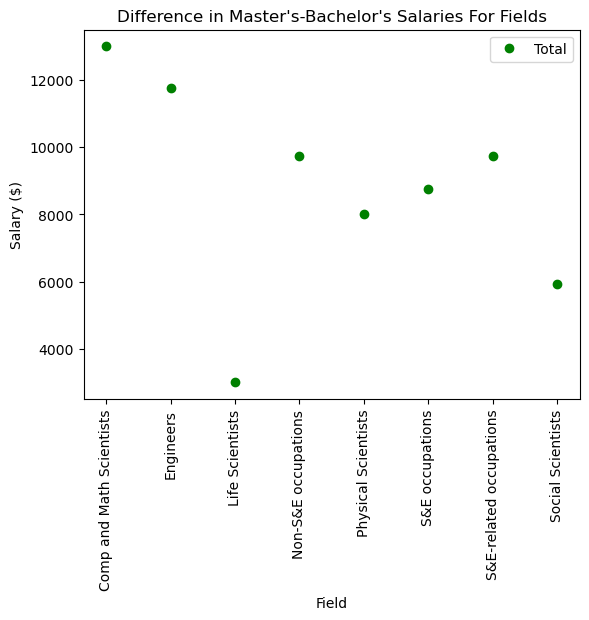

In [12]:
# graph 6 - difference in for masters - bachelors for different fields

difference_totals_field.plot(color='green', linewidth = 0, marker='o', markersize=6)
plt.title("Difference in Master's-Bachelor's Salaries For Fields")
plt.ylabel('Salary ($)')
plt.xticks(rotation=90) # without this and use commented fig size to get horizontal labels
# with this graph we can see that grad school may be worth it for some majors more than others

Text(0, 0.5, 'Salary ($)')

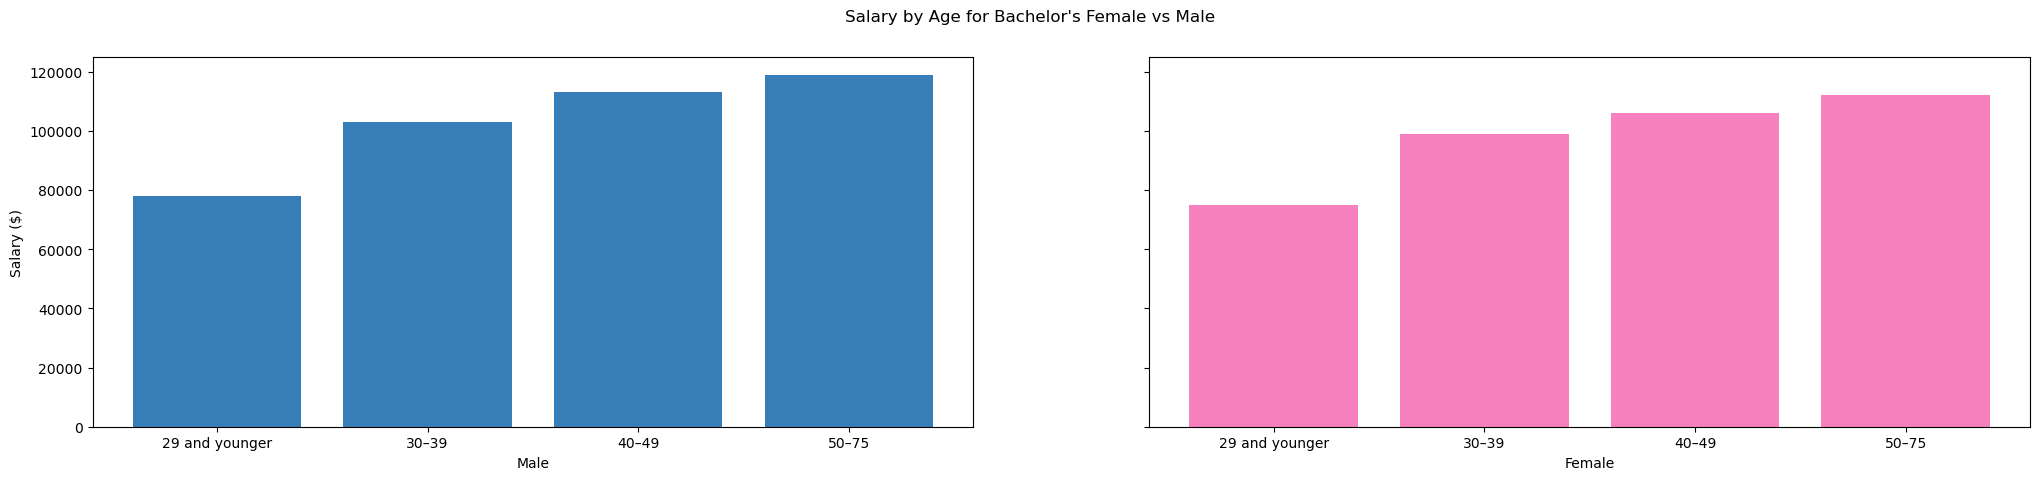

In [13]:
# graph 7 - bar graph of salary for bachelor's degrees between male and female
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.suptitle("Salary by Age for Bachelor's Female vs Male")
fig.set_figwidth(25)
ax1.bar(bachelors.Ages, bachelors.Male, color = "#377eb8")
ax2.bar(bachelors.Ages, bachelors.Female, color = "#f781bf")
ax1.set_xlabel("Male")
ax2.set_xlabel("Female")
ax1.set_ylabel("Salary ($)")


In [14]:
# after graphing different aspects of the data we wanted to statistically prove that there was a significant difference
# between masters v bachelories salaries
# To do this we will do a 2-sided t-test
# hypothesis
# mu1 is masters and mu2 is bachelors
# ho: mu1 - mu2 = 0
# ha: mu1 - mu2 > 0

bach = data[data['Degree-Level'] == "Bachelor's"]
#print(bach)
mast = data[data['Degree-Level'] == "Master's"]
#print(mast)

# create means
mu1 = mast['Total'].mean()
print("Master's Average Median Salary: ",mu1)
mu2 = bach['Total'].mean()
print("Bachelor's Average Median Salary: ",mu2)
# create standard deviations
sd1 = mast['Total'].std()
print("Master's Median Salaray Standard Deviation: ",sd1)
var1 = sd1 * sd1
sd2 = bach['Total'].std()
print("Bachelor's Median Salaray Standard Deviation: ",sd2)
var2 = sd2 * sd2
n1 = mast['Total'].count()
print("Master's Sample Size: ",n1)
n2 = bach['Total'].count()
print("Bachelor's Sample Size: ",n2)


test_stat = (mu1-mu2)/math.sqrt(var1/n1 + var2/n2)
print("Test Statistic T: ", test_stat)

Master's Average Median Salary:  87625.0
Bachelor's Average Median Salary:  79258.06451612903
Master's Median Salaray Standard Deviation:  24569.519537886383
Bachelor's Median Salaray Standard Deviation:  21396.211100621662
Master's Sample Size:  32
Bachelor's Sample Size:  31
Test Statistic T:  1.442744759889637


In [15]:
# Looking to see if there is a difference between bachelors v. all post-bachelors programs
# mu1 is grad and mu2 is bachelors
# ho: mu1 - mu2 = 0
# ha: mu1 - mu2 > 0

# create means
mu1 = grad['Total'].mean()
print("Graduate's Average Median Salary: ",mu1)
mu2 = bachelors['Total'].mean()
print("Bachelor's Average Median Salary: ",mu2)
# create standard deviations
sd1 = grad['Total'].std()
print("Graduates's Median Salaray Standard Deviation: ",sd1)
var1 = sd1 * sd1
sd2 = bachelors['Total'].std()
print("Bachelor's Median Salaray Standard Deviation: ",sd2)
var2 = sd2 * sd2
n1g = grad['Total'].count()
print("Graduate's Sample Size: ",n1g)
n2b = bachelors['Total'].count()
print("Bachelor's Sample Size: ",n2b)
test_stat = (mu1-mu2)/math.sqrt(var1/n1 + var2/n2)
print("Test Statistic T: ", test_stat)

Graduate's Average Median Salary:  100949.3670886076
Bachelor's Average Median Salary:  79258.06451612903
Graduates's Median Salaray Standard Deviation:  33933.154022312454
Bachelor's Median Salaray Standard Deviation:  21396.211100621662
Graduate's Sample Size:  79
Bachelor's Sample Size:  31
Test Statistic T:  3.044839030415991


From this we get the following conclusion for masters v. bachelors: <br>
t-score = 1.443 <br>
P(t30 > 1.443) = between .05 and .1  <br>
p-value = between .05 and .1  <br>
We reject the null hypothesis at an alpha = .1 and conclude that we are 90% confident that it is statisticaly signiifcant that Masters make more than Bacherlors

Conclusion: <br>
Based on the analysis that we have done in to this data set, we can conclude that there is a statistically significant difference in the salaries of master's graduates compared to bachelor's. We cannot conclude yet, though, that it would necessarially be worth it to attend two more years of college compared to just going into the workforce. This choice holds far more variables that will be further discussed in the presentation and executive summary. 